In [ ]:
import pandas as pd
import numpy as np

from core.database import *


commodity = 'gold'
db = Database(name='bdf')

data = db.get_commodity(commodity)
data.drop_duplicates(inplace=True)


In [183]:
%matplotlib inline

"""
    Import necessary libraries and define constant varibales, parameters, etc.
"""

import warnings
import datetime
import itertools

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams

# set pre-defined params
rcParams['figure.figsize'] = 15, 6
window = 15

data.sort_values('date', inplace=True)
data.set_index('date', inplace=True)
data


,commodity,high,low,open,price,vol,change,r,log_r
date,,,,,,,,,
2018-01-22,gold,1340.3,1332.9,1339.4,1336.9,104320.0,0.0029,-0.003578,-0.003584
2018-01-23,gold,1346.6,1335.8,1338.4,1341.7,70400.0,0.0036,-0.014470,-0.014576
2018-01-24,gold,1366.8,1344.1,1346.2,1361.4,159340.0,0.0147,-0.004825,-0.004836
2018-01-25,gold,1370.5,1346.2,1362.7,1368.0,142580.0,0.0048,0.007958,0.007926
2018-01-26,gold,1361.0,1348.6,1352.7,1357.2,142270.0,-0.0079,0.008996,0.008955
2018-01-29,gold,1356.3,1340.9,1353.7,1345.1,233760.0,-0.0089,0.003806,0.003799
2018-01-30,gold,1352.5,1337.5,1344.0,1340.0,412520.0,-0.0038,-0.002308,-0.002311
2018-01-31,gold,1351.0,1335.5,1341.8,1343.1,377140.0,0.0023,-0.003561,-0.003567
2018-02-01,gold,1354.3,1340.2,1348.2,1347.9,310500.0,0.0036,0.007926,0.007895


In [181]:
"""
    Sampling and transformation:
        - take a sample of data for a certain date range
        - transform closing price to its log return
        
        df['pct_change'] = df.price.pct_change()
        df['log_r'] = np.log(1 + df.pct_change)
        
        # Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
        log_r = np.log(data).diff()
"""
"""
# Generate returns
data['r'] = data['price'].pct_change()
data['log_r'] = np.log(1 + data.r)
data.dropna(inplace=True)
data.tail()
logs = data.log_r
"""


In [184]:
ts = data.price
ts


date
2018-01-22    1336.9
2018-01-23    1341.7
2018-01-24    1361.4
2018-01-25    1368.0
2018-01-26    1357.2
2018-01-29    1345.1
2018-01-30    1340.0
2018-01-31    1343.1
2018-02-01    1347.9
2018-02-02    1337.3
2018-02-05    1336.5
2018-02-06    1329.5
2018-02-07    1314.6
2018-02-08    1319.0
2018-02-09    1315.7
2018-02-12    1326.4
2018-02-13    1330.4
2018-02-14    1358.0
2018-02-15    1355.3
2018-02-16    1356.2
2018-02-18    1350.5
2018-02-19    1347.8
2018-02-20    1331.2
2018-02-21    1328.9
Name: price, dtype: float64

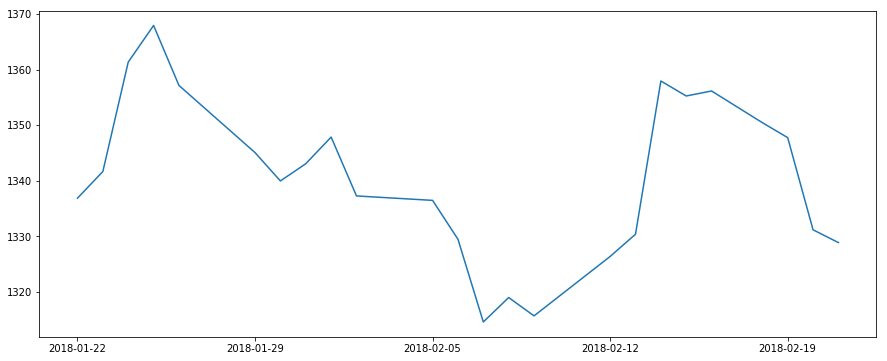

In [185]:
plt.plot(ts)


In [186]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window=3):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=window)
    rolstd = pd.rolling_std(timeseries, window=window)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


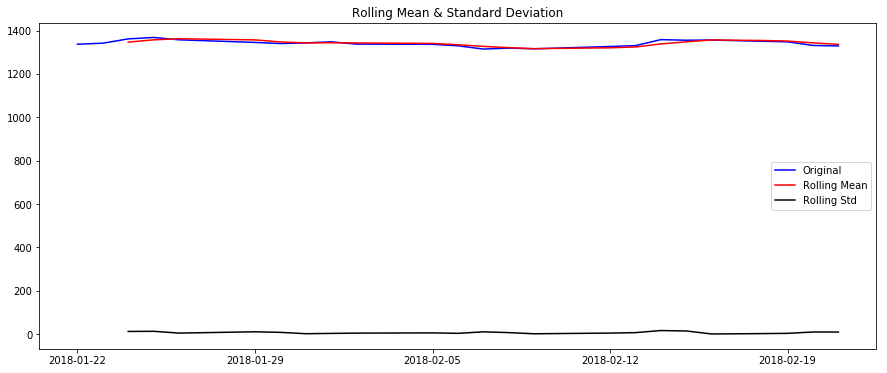

Results of Dickey-Fuller Test:
Test Statistic                 -2.093173
p-value                         0.247269
#Lags Used                      7.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [187]:
test_stationarity(ts)


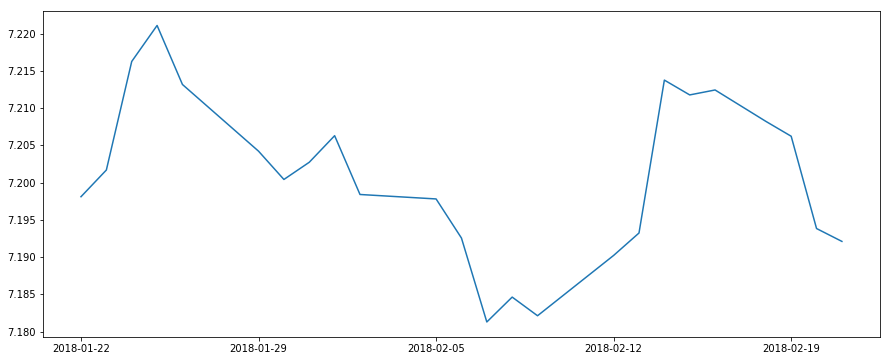

In [188]:
ts_log = np.log(ts)
plt.plot(ts_log)


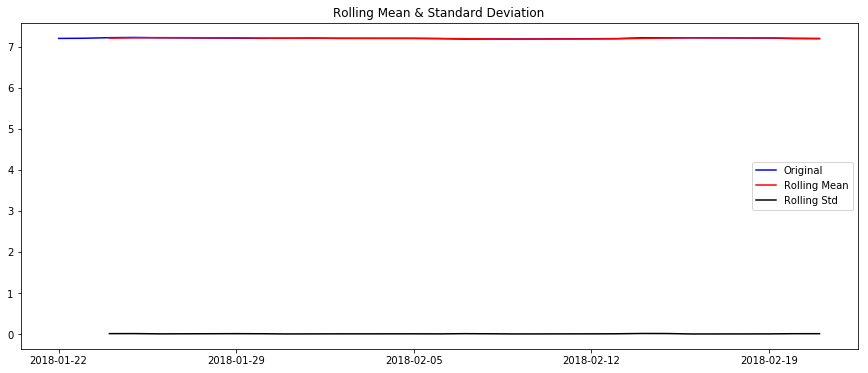

Results of Dickey-Fuller Test:
Test Statistic                 -2.103323
p-value                         0.243181
#Lags Used                      7.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [189]:
test_stationarity(ts_log)


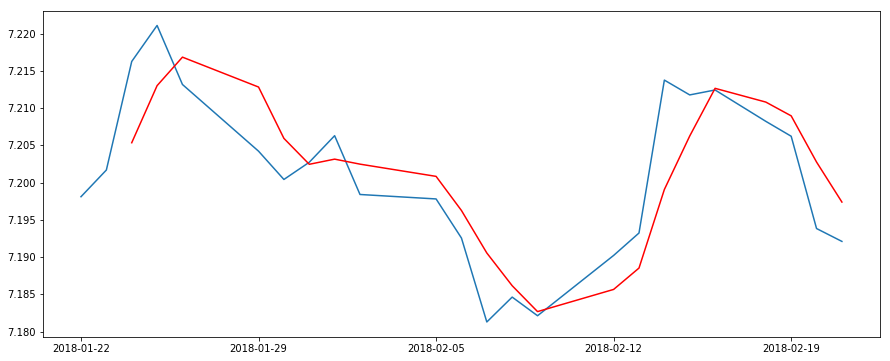

In [190]:
moving_avg = pd.rolling_mean(ts_log, 3)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [191]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff


date
2018-01-22         NaN
2018-01-23         NaN
2018-01-24    0.010912
2018-01-25    0.008083
2018-01-26   -0.003672
2018-01-29   -0.008612
2018-01-30   -0.005518
2018-01-31    0.000274
2018-02-01    0.003149
2018-02-02   -0.004074
2018-02-05   -0.003031
2018-02-06   -0.003700
2018-02-07   -0.009264
2018-02-08   -0.001529
2018-02-09   -0.000556
2018-02-12    0.004565
2018-02-13    0.004707
2018-02-14    0.014693
2018-02-15    0.005518
2018-02-16   -0.000221
2018-02-18   -0.002587
2018-02-19   -0.002738
2018-02-20   -0.008929
2018-02-21   -0.005284
Name: price, dtype: float64

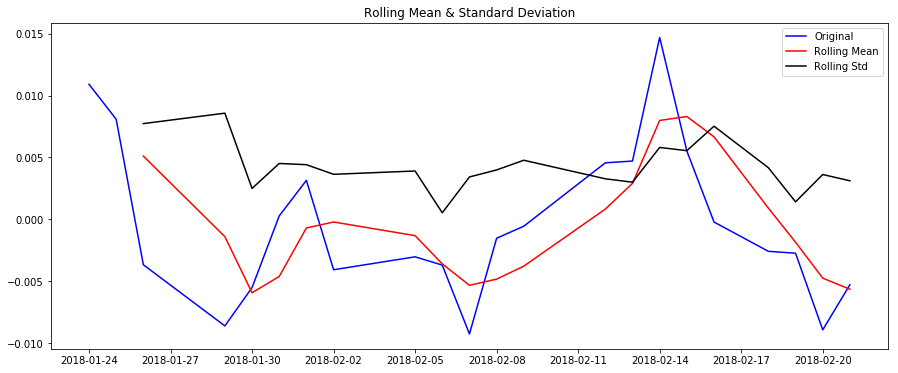

Results of Dickey-Fuller Test:
Test Statistic                 -1.773119
p-value                         0.393887
#Lags Used                      6.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64


In [192]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)


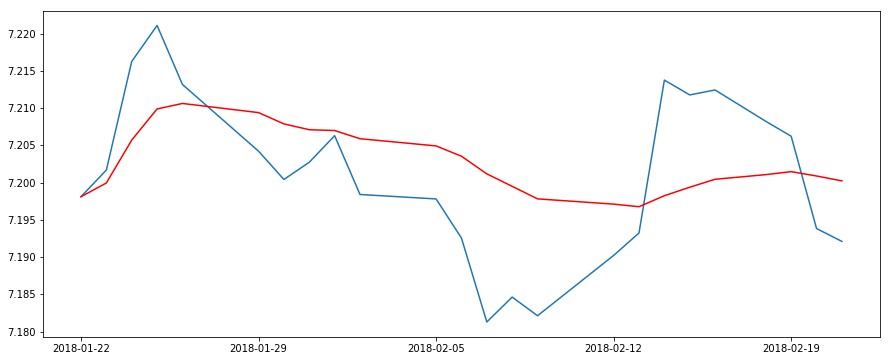

In [193]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')


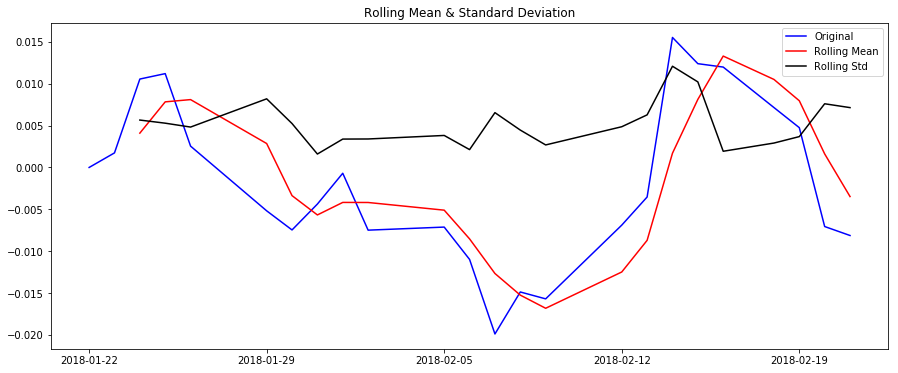

Results of Dickey-Fuller Test:
Test Statistic                 -2.168678
p-value                         0.217809
#Lags Used                      7.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [194]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


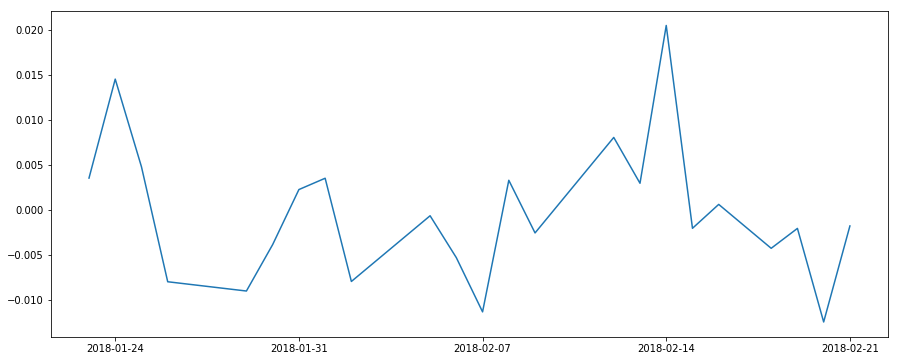

In [196]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


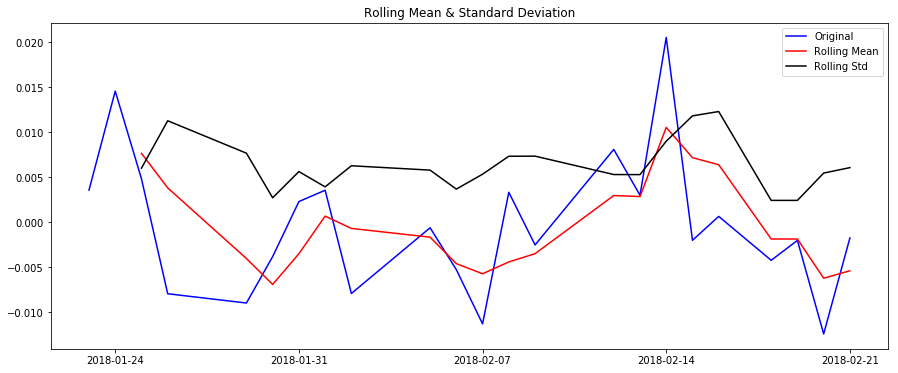

Results of Dickey-Fuller Test:
Test Statistic                 -1.574649
p-value                         0.496314
#Lags Used                      6.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [197]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


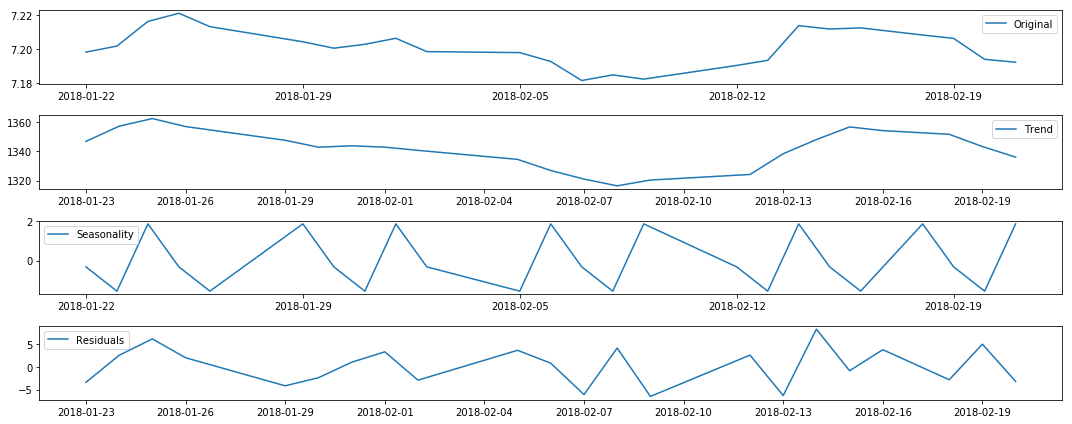

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose



decompfreq = 24*60/10*7
decomposition = seasonal_decompose(ts, freq=3, model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


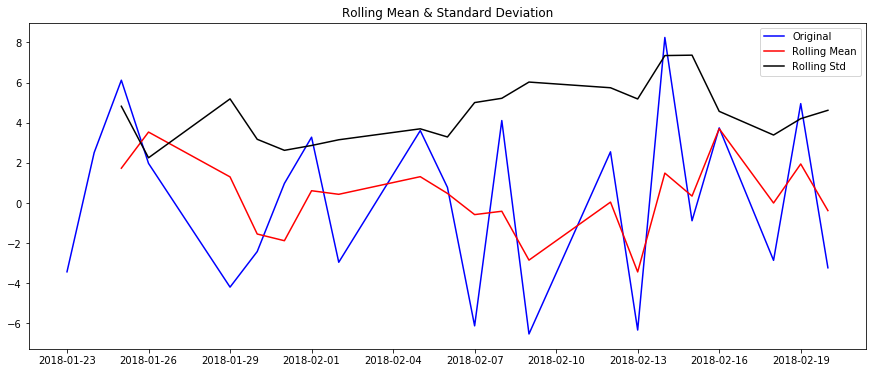

Results of Dickey-Fuller Test:
Test Statistic                -7.705231e+00
p-value                        1.306970e-11
#Lags Used                     0.000000e+00
Number of Observations Used    2.100000e+01
Critical Value (1%)           -3.788386e+00
Critical Value (5%)           -3.013098e+00
Critical Value (10%)          -2.646397e+00
dtype: float64


In [199]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


In [200]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=3)
lag_pacf = pacf(ts_log_diff, nlags=3, method='ols')


Text(0.5,1,'Autocorrelation Function')

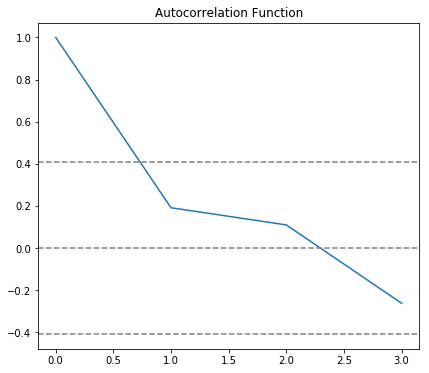

In [201]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# Number of MA (Moving Average) terms (q)
# q = 2

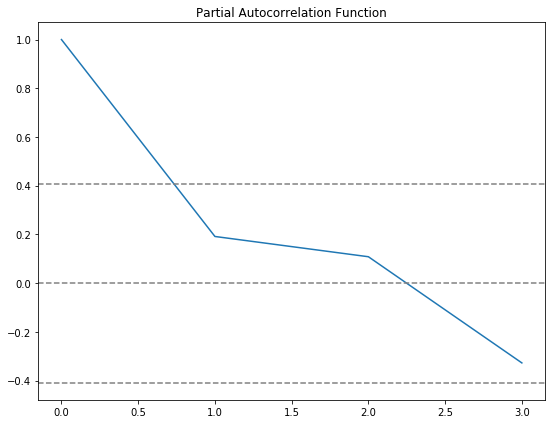

In [202]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Number of AR (Auto-Regressive) terms (p)
# p = 1

Text(0.5,1,'RSS: 0.0013')

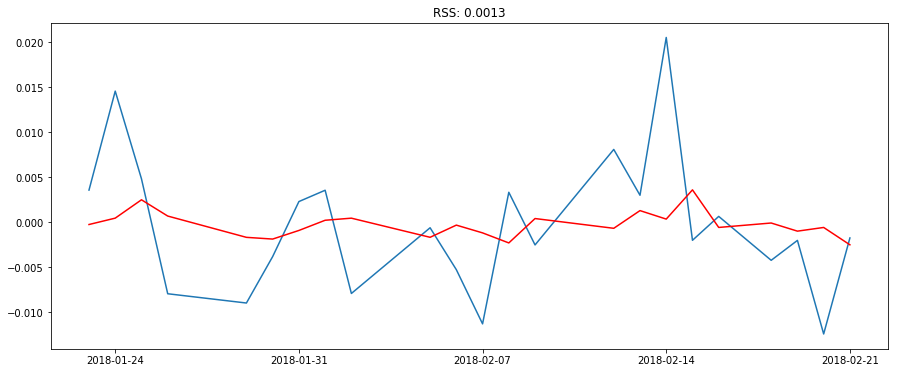

In [203]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


Text(0.5,1,'RSS: 0.0013')

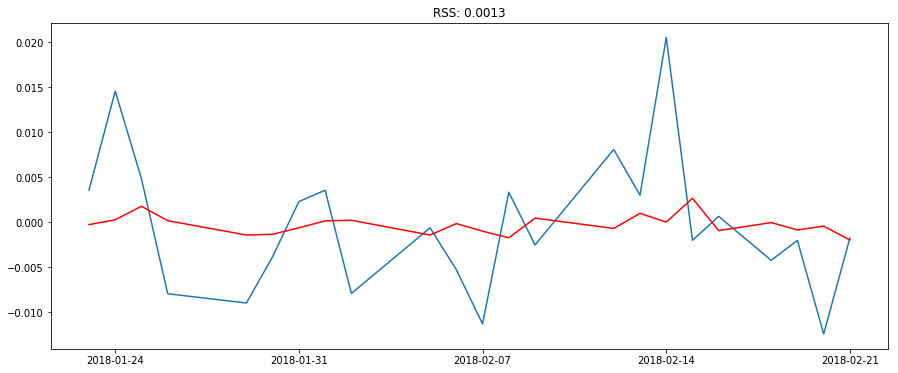

In [204]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))


Text(0.5,1,'RSS: 0.0013')

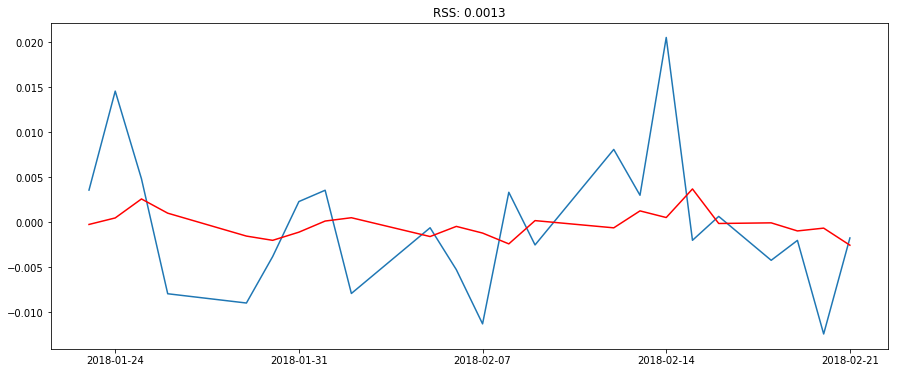

In [205]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [206]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)


date
2018-01-23   -0.000231
2018-01-24    0.000493
2018-01-25    0.002601
2018-01-26    0.001022
2018-01-29   -0.001522
2018-01-30   -0.001994
2018-01-31   -0.001088
2018-02-01    0.000147
2018-02-02    0.000516
2018-02-05   -0.001572
2018-02-06   -0.000447
2018-02-07   -0.001187
2018-02-08   -0.002387
2018-02-09    0.000195
2018-02-12   -0.000606
2018-02-13    0.001276
2018-02-14    0.000537
2018-02-15    0.003712
2018-02-16   -0.000123
2018-02-18   -0.000053
2018-02-19   -0.000951
2018-02-20   -0.000639
2018-02-21   -0.002535
dtype: float64


In [207]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())


date
2018-01-23   -0.000231
2018-01-24    0.000262
2018-01-25    0.002863
2018-01-26    0.003886
2018-01-29    0.002363
dtype: float64


In [208]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


date
2018-01-22    7.198109
2018-01-23    7.197878
2018-01-24    7.198371
2018-01-25    7.200972
2018-01-26    7.201994
dtype: float64

Text(0.5,1,'RMSE: 13.4459')

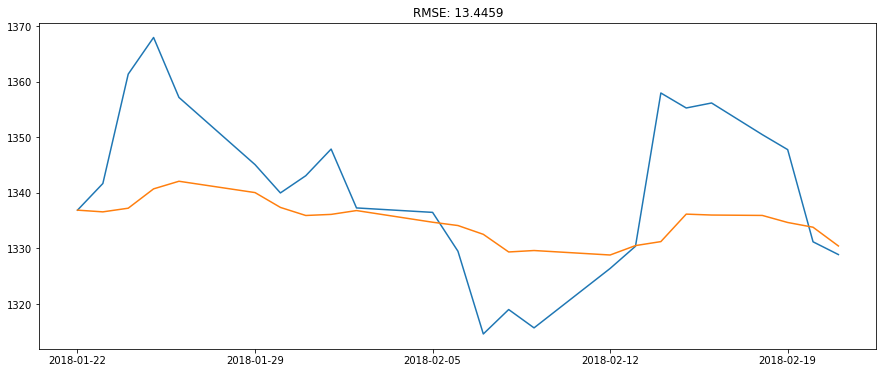

In [209]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))


In [210]:
pred_ARIMA_df = pd.DataFrame(predictions_ARIMA, columns=['pred_ARIMA'])
pred_ARIMA_df


,pred_ARIMA
date,
2018-01-22,1336.900000
2018-01-23,1336.591512
2018-01-24,1337.250978
2018-01-25,1340.733156
2018-01-26,1342.104702
2018-01-29,1340.062985
2018-01-30,1337.393606
2018-01-31,1335.939504
2018-02-01,1336.135920


In [211]:
df_price = pd.DataFrame(data['price'])
df_price


,price
date,
2018-01-22,1336.9
2018-01-23,1341.7
2018-01-24,1361.4
2018-01-25,1368.0
2018-01-26,1357.2
2018-01-29,1345.1
2018-01-30,1340.0
2018-01-31,1343.1
2018-02-01,1347.9


In [212]:
df_joined = df_price.join(pred_ARIMA_df, how='inner')
df_joined


,price,pred_ARIMA
date,,
2018-01-22,1336.9,1336.900000
2018-01-23,1341.7,1336.591512
2018-01-24,1361.4,1337.250978
2018-01-25,1368.0,1340.733156
2018-01-26,1357.2,1342.104702
2018-01-29,1345.1,1340.062985
2018-01-30,1340.0,1337.393606
2018-01-31,1343.1,1335.939504
2018-02-01,1347.9,1336.135920


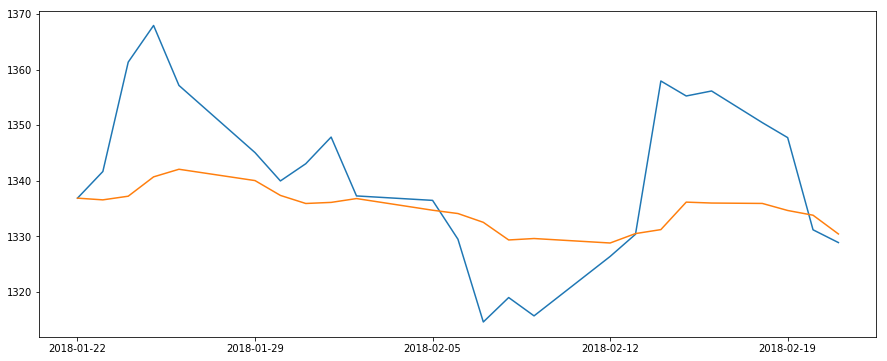

In [216]:
plt.plot(df_joined['price'])
plt.plot(df_joined['pred_ARIMA'])